In [1]:
text = """ Stocks (also capital stock, or sometimes interchangeably, shares) consist of all the shares[a] by which ownership of a corporation or company is divided.[1] A single share of the stock means fractional ownership of the corporation in proportion to the total number of shares. This typically entitles the shareholder (stockholder) to that fraction of the company's earnings, proceeds from liquidation of assets (after discharge of all senior claims such as secured and unsecured debt),[3] or voting power, often dividing these up in proportion to the number of like shares each stockholder owns. Not all stock is necessarily equal, as certain classes of stock may be issued, for example, without voting rights, with enhanced voting rights, or with a certain priority to receive profits or liquidation proceeds before or after other classes of shareholders.

Stock can be bought and sold privately or on stock exchanges. Transactions of the former are closely overseen by governments and regulatory bodies to prevent fraud, protect investors, and benefit the larger economy. As new shares are issued by a company, the ownership and rights of existing shareholders are diluted in return for cash to sustain or grow the business. Companies can also buy back stock, which often lets investors recoup the initial investment plus capital gains from subsequent rises in stock price. Stock options issued by many companies as part of employee compensation do not represent ownership, but represent the right to buy ownership at a future time at a specified price. This would represent a windfall to the employees if the option were exercised when the market price is higher than the promised price, since if they immediately sold the stock they would keep the difference (minus taxes).

Stock bought and sold in private markets fall within the private equity realm of finance.

A person who owns a percentage of the stock has the ownership of the corporation proportional to their share. The shares form a stock; the stock of a corporation is partitioned into shares, the total of which are stated at the time of business formation. Additional shares may subsequently be authorized by the existing shareholders and issued by the company. In some jurisdictions, each share of stock has a certain declared par value, which is a nominal accounting value used to represent the equity on the balance sheet of the corporation. In other jurisdictions, however, shares of stock may be issued without associated par value.

Shares represent a fraction of ownership in a business. A business may declare different types (or classes) of shares, each having distinctive ownership rules, privileges, or share values. Ownership of shares may be documented by issuance of a stock certificate. A stock certificate is a legal document that specifies the number of shares owned by the shareholder, and other specifics of the shares, such as the par value, if any, or the class of the shares.

Stock typically takes the form of shares of either common stock or preferred stock. As a unit of ownership, common stock typically carries voting rights that can be exercised in corporate decisions. Preferred stock differs from common stock in that it typically does not carry voting rights but is legally entitled to receive a certain level of dividend payments before any dividends can be issued to other shareholders.[5][6][page needed] Convertible preferred stock is preferred stock that includes the ability of the holder to convert the preferred shares into a fixed number of common shares, usually any time after a predetermined date. Shares of such stock are called "convertible preferred shares" (or "convertible preference shares" in the UK).

New equity issue may have specific legal clauses attached that differentiate them from previous issues of the issuer. Some shares of common stock may be issued without the typical voting rights, for instance, or some shares may have special rights unique to them and issued only to certain parties. Often, new issues that have not been registered with a securities governing body may be restricted from resale for certain periods of time.

Preferred stock may be hybrid by having the qualities of bonds of fixed returns and common stock voting rights. They also have preference in the payment of dividends over common stock and also have been given preference at the time of liquidation over common stock. They have other features of accumulation in dividend. In addition, preferred stock usually comes with a letter designation at the end of the security; for example, Berkshire-Hathaway Class "B" shares sell under stock ticker BRK.B, whereas Class "A" shares of ORION DHC, Inc will sell under ticker OODHA until the company drops the "A" creating ticker OODH for its "Common" shares only designation. This extra letter does not mean that any exclusive rights exist for the shareholders but it does let investors know that the shares are considered for such, however, these rights or privileges may change based on the decisions made by the underlying company."""

## Import basic libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import nltk
import tensorflow

#### Some Cleaning

In [3]:
words = text.split()
tokens = [word.lower() for word in words if len(word)>1 and word.isalpha()]
vocab= set(tokens)
vocab = dict((c,i) for i,c in enumerate(vocab))

In [4]:
# Define window size
window_size = 2

# Generate pairs
pairs = []
for idx, target_word in enumerate(tokens):
    start = max(idx - window_size, 0)
    end = min(idx + window_size + 1, len(tokens))
    
    # Add context words
    for context_idx in range(start, end):
        if context_idx != idx:
            pairs.append((target_word, tokens[context_idx]))

print("Target-Context Pairs:", pairs)

Target-Context Pairs: [('stocks', 'capital'), ('stocks', 'or'), ('capital', 'stocks'), ('capital', 'or'), ('capital', 'sometimes'), ('or', 'stocks'), ('or', 'capital'), ('or', 'sometimes'), ('or', 'consist'), ('sometimes', 'capital'), ('sometimes', 'or'), ('sometimes', 'consist'), ('sometimes', 'of'), ('consist', 'or'), ('consist', 'sometimes'), ('consist', 'of'), ('consist', 'all'), ('of', 'sometimes'), ('of', 'consist'), ('of', 'all'), ('of', 'the'), ('all', 'consist'), ('all', 'of'), ('all', 'the'), ('all', 'by'), ('the', 'of'), ('the', 'all'), ('the', 'by'), ('the', 'which'), ('by', 'all'), ('by', 'the'), ('by', 'which'), ('by', 'ownership'), ('which', 'the'), ('which', 'by'), ('which', 'ownership'), ('which', 'of'), ('ownership', 'by'), ('ownership', 'which'), ('ownership', 'of'), ('ownership', 'corporation'), ('of', 'which'), ('of', 'ownership'), ('of', 'corporation'), ('of', 'or'), ('corporation', 'ownership'), ('corporation', 'of'), ('corporation', 'or'), ('corporation', 'compa

In [5]:
# One-hot encoding
def one_hot_vector(word, vocab_size, word_to_index):
    vector = np.zeros(vocab_size)
    vector[word_to_index[word]] = 1
    return vector

# Example
vocab_size = len(vocab)
word_to_index = vocab

one_hot_example = one_hot_vector("stocks", vocab_size, word_to_index)
print("One-hot vector for 'stocks':", one_hot_example)

One-hot vector for 'stocks': [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [6]:
import tensorflow as tf

# Parameters
embedding_dim = 50  # Size of embedding vector

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy')

c:\Users\ELFEKY\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [7]:
# Prepare input-output data
X_train = [word_to_index[target] for target, context in pairs]
y_train = [one_hot_vector(context, vocab_size, word_to_index) for target, context in pairs]

X_train = np.array(X_train)
y_train = np.array(y_train)

In [8]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Extract word embeddings
embeddings = model.layers[0].get_weights()[0]  # Embedding layer weights

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5965
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5597
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.5125
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4441
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 5.3470
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.2088
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0799
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.9457
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.8298
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7733
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6963  
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6368
Epoch 13/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5649 
Epoch 14/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4621
Epoch 15/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4355

In [9]:
word_vector = embeddings[word_to_index['stock']]
print("Vector for 'love':", word_vector)

Vector for 'love': [-0.10713093 -0.24266341  0.48565027  0.26537102  0.3040801   0.3262739
  0.43284425 -0.02060375 -0.22835237  0.01577157 -0.20063065  0.20787218
 -0.09842968  0.44545722  0.7986315  -0.27446485  0.19401173 -0.5122282
 -0.38130817  0.5759187  -0.35171357 -0.43734422 -0.7108736   0.06611647
 -0.15904076 -0.10542971  0.09216505 -0.14613047  1.1051044   0.2498743
 -0.24890651  0.6980149   0.08082036  0.52783364 -0.80960536  0.0409392
  0.29759592  0.38902986 -0.52177286 -0.16198674  0.33179265  1.1111372
  0.45521882 -0.13511921  0.12105305 -0.05053224  0.04872056  0.26595291
 -0.16922444  0.34966266]


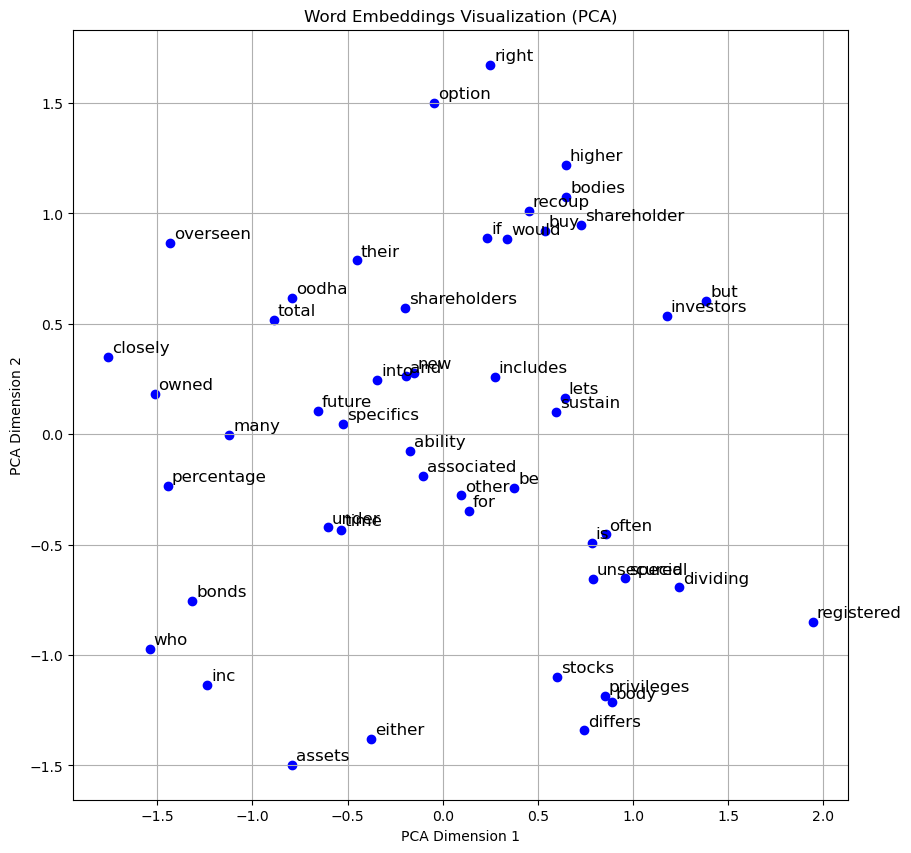

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce embedding dimensions to 2
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Visualize a subset of words for clarity
def plot_embeddings(embeddings, word_to_index, words_to_plot=20):
    plt.figure(figsize=(10, 10))
    # Select the first `words_to_plot` words from the vocabulary
    selected_words = list(word_to_index.keys())[:words_to_plot]
    selected_embeddings = [embeddings[word_to_index[word]] for word in selected_words]

    # Reduce dimensions for visualization
    reduced = PCA(n_components=2).fit_transform(selected_embeddings)
    
    # Plot the points
    for word, coord in zip(selected_words, reduced):
        plt.scatter(coord[0], coord[1], marker='o', color='blue')
        plt.text(coord[0] + 0.02, coord[1] + 0.02, word, fontsize=12)
    
    plt.title("Word Embeddings Visualization (PCA)")
    plt.xlabel("PCA Dimension 1")
    plt.ylabel("PCA Dimension 2")
    plt.grid(True)
    plt.show()

# Plot embeddings
plot_embeddings(reduced_embeddings, word_to_index, words_to_plot=50)